In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Contents of Notebook

**Part 1: Import and plot new observed data and new generate rating curve**
- Data was collected from April 2019-January 2020
    - Discharge data was collected via boat and ADCP
    - SSC was calculated from water bottle samples, averaged across 3 locations along a transect
- Data are plotted as Water Discharge vs. SSC
- A rating curve is generated using a power law function between Qw and SSC

**Part 2: Generate and plot rating curves from simulated (HydroTrend) data**
- Reference (historic) scenario
    - Load data into notebook
    - Generate rating curves from model outputs from reference scenario dataset
    - Plot various rating curves: HT-generated (reference), observed data (new), and historic curves
- Recent time scenario
    - Generate rating curves from *2 years* of model outputs (that correspond with date when observed data were collected)
    - Plot various rating curves: HT-generated (2 yrs of data), observed data, and historic curves
        - 2 versions: rcp4.5 and rcp8.5

**Part 3: Compute sediment loads using various methods; compare simulated with observed**
- Observed Qs values
    - Compute HISTORIC Qs via historic rating curve
    - Compute RECENT Qs from observed water data via new rating curve (from 2.3)
- Simulated Qs values
    - Compute HISTORIC Qs using HT-generated rating curves 
    - Compute RECENT Qs from HT data over observation time period (2019-2020)
        - Use new rating curve (from 2.4c) ***for Rcp4.5***
        - Use new rating curve (from 2.4e) ***for Rcp8.5***

## Part 1: Import and plot new observed data and generate new rating curve

### 1.1. Import new observed data

In [2]:
# data from IWM
data_obs_new = pd.DataFrame(pd.read_csv('../sed_data/Brahmaputra_q_ssc_2.txt', delimiter = '\t'))
data_obs_new['Date'] = pd.to_datetime(data_obs_new['Date'])
data_obs_new

Date  Discharge (m3/S)  SSC (mg/l)
0  2019-04-12              6778     133.072
1  2019-04-29              7915     365.818
2  2019-05-25             17618     134.284
3  2019-06-17             19080     298.234
4  2019-07-01             39962     424.893
5  2019-07-12             53741    1197.219
6  2019-07-25             69111     760.338
7  2019-08-05             50188     539.549
8  2019-08-19             36832     834.811
9  2019-09-04             24988     402.754
10 2019-10-08             28258     479.881
11 2019-11-06             14470     320.127
12 2019-11-22              9515     215.926
13 2019-12-24              6497     226.005
14 2020-01-07              6597      37.857
15 2020-01-22              4888      99.798

### 1.2. Plot new observed data

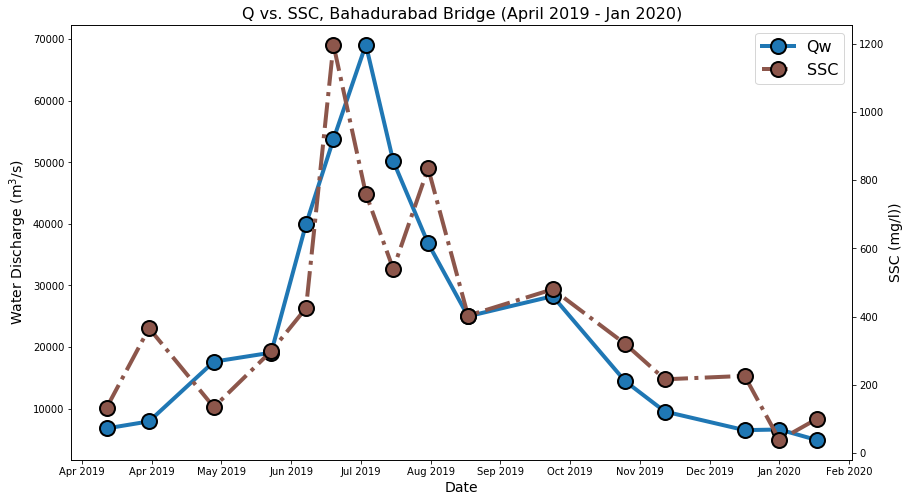

In [3]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib import rc
rc('mathtext', default = 'regular')

fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot()

lns1 = ax.plot(data_obs_new['Date'], data_obs_new['Discharge (m3/S)'],
         '-o', color='tab:blue', markersize=15, 
         linewidth=4,markerfacecolor='tab:blue', 
         markeredgecolor='k', markeredgewidth=2,
        label = 'Qw')

ax2 = ax.twinx()
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax2.xaxis.set_major_formatter(DateFormatter("%b %Y"))

lns2 = ax2.plot(data_obs_new['Date'], data_obs_new['SSC (mg/l)'],  
         '-.o', color='tab:brown', markersize=15, linewidth=4,
         markerfacecolor='tab:brown', markeredgecolor='k', markeredgewidth=2,
        label = 'SSC')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 0, fontsize = 16)

#ax.grid()
ax.set_xlabel('Date', size = 14)
ax.set_ylabel('Water Discharge (m$^3/$s)', size = 14)
ax2.set_ylabel('SSC (mg/l))', size = 14)
plt.title('Q vs. SSC, Bahadurabad Bridge (April 2019 - Jan 2020)', size = 16)
plt.show()

fig.savefig('../../figures/v2/sed_cal/q_ssc_BR.png', figsize=300)

### 1.3. Generate rating curve from new observed data

In [4]:
# calculate new rating curve with observed data, converting concentration to a flux

from scipy.optimize import curve_fit
from scipy import stats

x = data_obs_new['Discharge (m3/S)']
y = data_obs_new['SSC (mg/l)']*data_obs_new['Discharge (m3/S)']*1e-6/1e-3

new_curve = slope, intercept, rvalue, pvalue, std_err = stats.linregress(np.log(x), np.log(y))
print('new curve: slope: {:.3}    intercept: {:.3}    r-squared: {:.3}'.format(new_curve.slope, np.exp(new_curve.intercept), new_curve.rvalue**2))

new curve: slope: 1.82    intercept: 9.55e-05    r-squared: 0.905


## Part 2: Generate and plot rating curves from simulated (HydroTrend) data
### 2.1. Reference scenario
#### 2.1a) Load data 

In [5]:
# Import hydrotrend data
# Qw
gfdl_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/HadGEM2/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/NORESM-M/Hydrotrend/HYDROASCII.Q', skip_header = True)
# Qs
gfdl_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/HadGEM2/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/NORESM-M/Hydrotrend/HYDROASCII.QS', skip_header = True)

#### 2.1b) Generate rating curves from model outputs

In [6]:
# Calculate new rating curve stats from HT outputs
gfdl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw[1:]), np.log(gfdl_qs[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl.slope, np.exp(gfdl.intercept), gfdl.rvalue**2))

hadgem = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw[1:]), np.log(hadgem_qs[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem.slope, np.exp(hadgem.intercept), hadgem.rvalue**2))

ipsl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw[1:]), np.log(ipsl_qs[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl.slope, np.exp(ipsl.intercept), ipsl.rvalue**2))

miroc = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw[1:]), np.log(miroc_qs[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc.slope, np.exp(miroc.intercept), miroc.rvalue**2))

noresm = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw[1:]), np.log(noresm_qs[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm.slope, np.exp(noresm.intercept), noresm.rvalue**2))

gfdl: slope:2.85    intercept: 2.99e-09    r-squared: 0.94
hadgem: slope:2.86    intercept: 3.2e-09    r-squared: 0.95
ipsl: slope:2.87    intercept: 1.69e-09    r-squared: 0.94
miroc: slope:2.84    intercept: 3.62e-09    r-squared: 0.95
noresm: slope:2.86    intercept: 2.44e-09    r-squared: 0.95


#### 2.1c) Plot various rating curves: HT-generated (ref), observed data (new), and historic curves

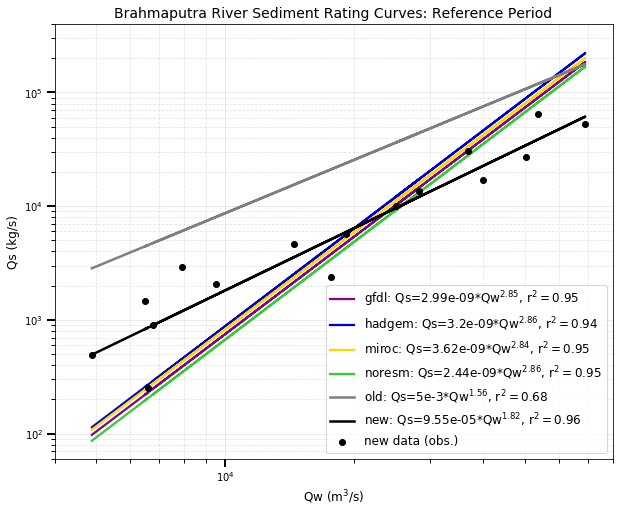

In [7]:
y_new = 9.55e-05*x**1.82         # new curve, obs data
y_old = 5e-3*x**1.56             # old curve
y_gfdl = 2.99e-09*x**2.85        # gfdl curve
y_hadgem = 3.2e-09*x**2.86       # hadgem curve
y_ipsl = 1.69e-09*x**2.87        # ipsl curve
y_miroc = 3.62e-09*x**2.84       # miroc curve
y_noresm = 2.44e-09*x**2.86      # noresm curve

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha = 0.2)
ax.grid(b=True, which='minor', color='grey', linestyle='--', alpha = 0.2)

plt.plot(x, y_gfdl, label = 'gfdl: Qs=2.99e-09*Qw$^{2.85}$, $r^2=0.95$', color='darkmagenta', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_hadgem, label = 'hadgem: Qs=3.2e-09*Qw$^{2.86}$, $r^2=0.94$', color = 'mediumblue', linestyle = 'solid', linewidth = 2.25, zorder=2)
#plt.plot(x, y_ipsl, label = 'ipsl: Qs=1.69e-09*Qw$^{2.87}$, $r^2=0.93$', color = 'mediumturquoise', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_miroc, label = 'miroc: Qs=3.62e-09*Qw$^{2.84}$, $r^2=0.95$', color = 'gold', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_noresm, label = 'noresm: Qs=2.44e-09*Qw$^{2.86}$, $r^2=0.95$', color = 'limegreen', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_old, label = 'old: Qs=5e-3*Qw$^{1.56}$, $r^2=0.68$', color = "tab:gray", linestyle = 'solid', linewidth = 2.5)
plt.plot(x, y_new, label = 'new: Qs=9.55e-05*Qw$^{1.82}$, $r^2=0.96$', color = "k", linestyle = "solid", linewidth = 2.5)
plt.scatter(x, y, label='new data (obs.)', color = "k", zorder=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(4e3, 8e4)
ax.set_ylim(6e1, 4e5)
ax.set_ylabel('Qs (kg/s)', size = 12)
ax.set_xlabel('Qw (m$^3/$s)', size = 12)
ax.tick_params(which = 'major', width = 2, length = 8)
ax.tick_params(which = 'minor', width = 1, length = 4)
plt.title('Brahmaputra River Sediment Rating Curves: Reference Period', size = 14)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

fig.savefig('../../figures/v2/sed_cal/rating_curve_BR.png', size = 300)

### 2.2. Recent (2020) time period

#### 2.2a) Load HT data (rcp4.5 and rcp8.5 scenarios)

In [8]:
# Rcp4.5
# Qw
gfdl_qw_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
# Qs
gfdl_qs_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_4p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)

In [9]:
# Rcp8.5
# Qw
gfdl_qw_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
# Qs
gfdl_qs_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_8p5 = np.genfromtxt('../../setup/run_2/Brahmaputra/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)

#### 2.2b) Clip arrays to be only 2 years worth of data (2019-2020)

In [10]:
# Rcp4.5
# Qw
gfdl_qw_4p5_clip = np.array(gfdl_qw_4p5[4745:5475])
hadgem_qw_4p5_clip = np.array(hadgem_qw_4p5[4745:5475])
ipsl_qw_4p5_clip = np.array(ipsl_qw_4p5[4745:5475])
miroc_qw_4p5_clip = np.array(miroc_qw_4p5[4745:5475])
noresm_qw_4p5_clip = np.array(noresm_qw_4p5[4745:5475])
# Qs
gfdl_qs_4p5_clip = np.array(gfdl_qs_4p5[4745:5475])
hadgem_qs_4p5_clip = np.array(hadgem_qs_4p5[4745:5475])
ipsl_qs_4p5_clip = np.array(ipsl_qs_4p5[4745:5475])
miroc_qs_4p5_clip = np.array(miroc_qs_4p5[4745:5475])
noresm_qs_4p5_clip = np.array(noresm_qs_4p5[4745:5475])

In [11]:
# Rcp8.5
# Qw
gfdl_qw_8p5_clip = np.array(gfdl_qw_8p5[4745:5475])
hadgem_qw_8p5_clip = np.array(hadgem_qw_8p5[4745:5475])
ipsl_qw_8p5_clip = np.array(ipsl_qw_8p5[4745:5475])
miroc_qw_8p5_clip = np.array(miroc_qw_8p5[4745:5475])
noresm_qw_8p5_clip = np.array(noresm_qw_8p5[4745:5475])
# Qs
gfdl_qs_8p5_clip = np.array(gfdl_qs_8p5[4745:5475])
hadgem_qs_8p5_clip = np.array(hadgem_qs_8p5[4745:5475])
ipsl_qs_8p5_clip = np.array(ipsl_qs_8p5[4745:5475])
miroc_qs_8p5_clip = np.array(miroc_qs_8p5[4745:5475])
noresm_qs_8p5_clip = np.array(noresm_qs_8p5[4745:5475])

#### 2.2c) Generate new rating curves from 2 years of HT data (2019-2020) ***for Rcp4.5***

In [12]:
# calculate new rating curve stats from HT outputs (2019-2020), rcp4p5

gfdl_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw_4p5_clip[1:]), np.log(gfdl_qs_4p5_clip[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl_4p5.slope, np.exp(gfdl_4p5.intercept), gfdl_4p5.rvalue**2))

hadgem_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw_4p5_clip[1:]), np.log(hadgem_qs_4p5_clip[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem_4p5.slope, np.exp(hadgem_4p5.intercept), hadgem_4p5.rvalue**2))

ipsl_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw_4p5_clip[1:]), np.log(ipsl_qs_4p5_clip[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl_4p5.slope, np.exp(ipsl_4p5.intercept), ipsl_4p5.rvalue**2))

miroc_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw_4p5_clip[1:]), np.log(miroc_qs_4p5_clip[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc_4p5.slope, np.exp(miroc_4p5.intercept), miroc_4p5.rvalue**2))

noresm_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw_4p5_clip[1:]), np.log(noresm_qs_4p5_clip[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm_4p5.slope, np.exp(noresm_4p5.intercept), noresm_4p5.rvalue**2))

gfdl: slope:2.75    intercept: 5.11e-09    r-squared: 0.97
hadgem: slope:2.73    intercept: 1.21e-08    r-squared: 0.97
ipsl: slope:2.8    intercept: 1.08e-09    r-squared: 0.97
miroc: slope:2.72    intercept: 9.7e-09    r-squared: 0.97
noresm: slope:2.73    intercept: 7.5e-09    r-squared: 0.97


#### 2.2d) Plot new rating curves from 2 years of HT data (2019-2020) ***for Rcp4.5***

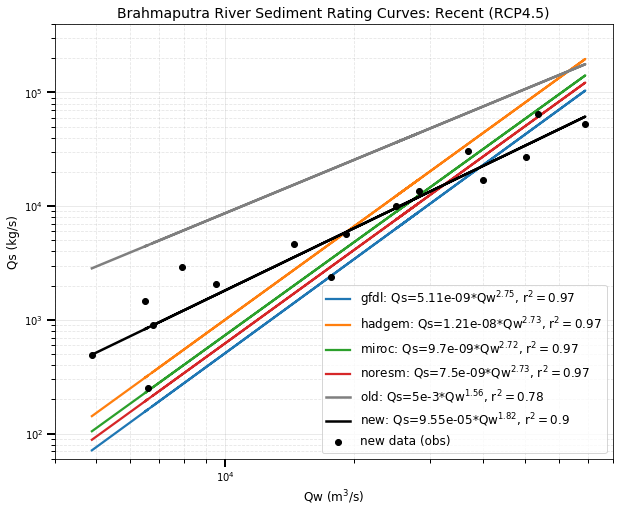

In [13]:
#Rcp4p5

y_new = 9.55e-05*x**1.82         # new curve, obs data
y_old = 5e-3*x**1.56             # old curve
y_gfdl = 5.11e-09*x**2.75        # gfdl curve
y_hadgem = 1.21e-08*x**2.73      # hadgem curve
y_ipsl = 1.08e-09*x**2.8         # ipsl curve
y_miroc = 9.7e-09*x**2.72        # miroc curve
y_noresm = 7.5e-09*x**2.73       # noresm curve

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha = 0.2)
ax.grid(b=True, which='minor', color='grey', linestyle='--', alpha = 0.2)

plt.plot(x, y_gfdl, label = 'gfdl: Qs=5.11e-09*Qw$^{2.75}$, $r^2=0.97$',  linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_hadgem, label = 'hadgem: Qs=1.21e-08*Qw$^{2.73}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
#plt.plot(x, y_ipsl, label = 'ipsl: Qs=1.08e-09*Qw$^{2.8}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_miroc, label = 'miroc: Qs=9.7e-09*Qw$^{2.72}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_noresm, label = 'noresm: Qs=7.5e-09*Qw$^{2.73}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_old, label = 'old: Qs=5e-3*Qw$^{1.56}$, $r^2=0.78$', color = "tab:gray", linestyle = 'solid', linewidth = 2.5)
plt.plot(x, y_new, label = 'new: Qs=9.55e-05*Qw$^{1.82}$, $r^2=0.9$', color = "k", linestyle = "solid", linewidth = 2.5)
plt.scatter(x, y, label='new data (obs)', color = "k", zorder=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(4e3, 8e4)
ax.set_ylim(6e1, 4e5)
ax.set_ylabel('Qs (kg/s)', size = 12)
ax.set_xlabel('Qw (m$^3/$s)', size = 12)
ax.tick_params(which = 'major', width = 2, length = 8)
ax.tick_params(which = 'minor', width = 1, length = 4)

plt.title('Brahmaputra River Sediment Rating Curves: Recent (RCP4.5)', size = 14)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

fig.savefig('../../figures/v2/sed_cal/rating_curve_BR_4p5.png', size=300)

#### 2.2e) Generate new rating curves from 2 years of HT data (2019-2020) ***for Rcp8.5***

In [14]:
# Rcp8p5

gfdl_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw_8p5_clip[1:]), np.log(gfdl_qs_8p5_clip[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl_8p5.slope, np.exp(gfdl_8p5.intercept), gfdl_8p5.rvalue**2))

hadgem_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw_8p5_clip[1:]), np.log(hadgem_qs_8p5_clip[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem_8p5.slope, np.exp(hadgem_8p5.intercept), hadgem_8p5.rvalue**2))

ipsl_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw_8p5_clip[1:]), np.log(ipsl_qs_8p5_clip[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl_8p5.slope, np.exp(ipsl_8p5.intercept), ipsl_8p5.rvalue**2))

miroc_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw_8p5_clip[1:]), np.log(miroc_qs_8p5_clip[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc_8p5.slope, np.exp(miroc_8p5.intercept), miroc_8p5.rvalue**2))

noresm_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw_8p5_clip[1:]), np.log(noresm_qs_8p5_clip[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm_8p5.slope, np.exp(noresm_8p5.intercept), noresm_8p5.rvalue**2))

gfdl: slope:2.76    intercept: 6.44e-09    r-squared: 0.97
hadgem: slope:2.75    intercept: 9.86e-09    r-squared: 0.97
ipsl: slope:2.72    intercept: 4.8e-09    r-squared: 0.96
miroc: slope:2.77    intercept: 8.23e-09    r-squared: 0.97
noresm: slope:2.73    intercept: 8.9e-09    r-squared: 0.97


#### 2.2f) Plot new rating curves from 2 years of HT data (2019-2020) ***for Rcp8.5***

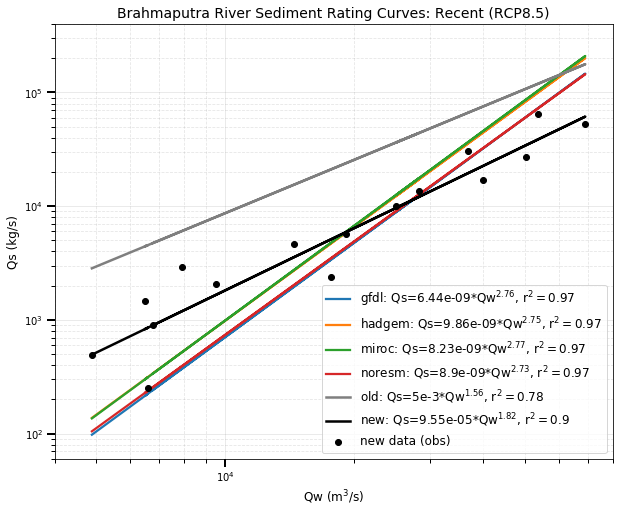

In [15]:
# Rcp8p5

y_new = 9.55e-05*x**1.82         # new curve, obs data
y_old = 5e-3*x**1.56             # old curve
y_gfdl = 6.44e-09*x**2.76        # gfdl curve
y_hadgem = 9.86e-09*x**2.75      # hadgem curve
y_ipsl = 4.8e-09*x**2.72         # ipsl curve
y_miroc = 8.23e-09*x**2.77       # miroc curve
y_noresm = 8.9e-09*x**2.73       # noresm curve

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha = 0.2)
ax.grid(b=True, which='minor', color='grey', linestyle='--', alpha = 0.2)

plt.plot(x, y_gfdl, label = 'gfdl: Qs=6.44e-09*Qw$^{2.76}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_hadgem, label = 'hadgem: Qs=9.86e-09*Qw$^{2.75}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
#plt.plot(x, y_ipsl, label = 'ipsl: Qs=4.8e-09*Qw$^{2.72}$, $r^2=0.96$', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_miroc, label = 'miroc: Qs=8.23e-09*Qw$^{2.77}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_noresm, label = 'noresm: Qs=8.9e-09*Qw$^{2.73}$, $r^2=0.97$', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_old, label = 'old: Qs=5e-3*Qw$^{1.56}$, $r^2=0.78$', color = "tab:gray", linestyle = 'solid', linewidth = 2.5)
plt.plot(x, y_new, label = 'new: Qs=9.55e-05*Qw$^{1.82}$, $r^2=0.9$', color = "k", linestyle = "solid", linewidth = 2.5)
plt.scatter(x, y, label='new data (obs)', color = "k", zorder=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(4e3, 8e4)
ax.set_ylim(6e1, 4e5)
ax.set_ylabel('Qs (kg/s)', size = 12)
ax.set_xlabel('Qw (m$^3/$s)', size = 12)
ax.tick_params(which = 'major', width = 2, length = 8)
ax.tick_params(which = 'minor', width = 1, length = 4)

plt.title('Brahmaputra River Sediment Rating Curves: Recent (RCP8.5)', size = 14)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

fig.savefig('../../figures/v2/sed_cal/rating_curve_BR_8p5.png', size=300)

## Part 3: Compute sediment loads using various methods; compare simulated with observed

### 3.1. Observed Qs values

#### 3.1a)  Compute HISTORIC sediment load via historic rating curve

In [16]:
# Re-import observed water discharge data as pandas dataframe
data_obs_qw = pd.DataFrame(pd.read_csv('../../water_data/Brahmaputra/Baha_Qw_1976-2002.csv'))
data_obs_qw['Date'] = pd.to_datetime(data_obs_qw['Date'], format="%m/%d/%y")
data_obs_qw

Date  Discharge (m3/s)
0    1976-01-01            5800.0
1    1976-01-02            5720.0
2    1976-01-03            5690.0
3    1976-01-04            5600.0
4    1976-01-05            5490.0
...         ...               ...
9850 2002-12-20            6534.0
9851 2002-12-21            6479.0
9852 2002-12-22            6424.0
9853 2002-12-23            6370.0
9854 2002-12-24            6315.0

[9855 rows x 2 columns]

In [17]:
# Plug in historic observed data into historic rating curve
# Get average sediment load over reference scenario
data_obs_qs = 5e-3*(data_obs_qw['Discharge (m3/s)']**1.56)
data_obs_qs_sum = data_obs_qs.sum()
data_obs_qs_avg_kgs = data_obs_qs_sum/10950
data_obs_qs_avg_mtyr = data_obs_qs_avg_kgs*3.14e7/1e9
print('Avg Qs over HISTORIC observation time period (MT/yr): {:.5}'.format(data_obs_qs_avg_mtyr))

Avg Qs over HISTORIC observation time period (MT/yr): 1000.1


#### 3.1b) Compute RECENT sediment load from new observed water data via new rating curve (from 2.3)

In [18]:
# Average sediment load over 17 discrete samples
obs_avg_2020_new = 9.55e-05*(data_obs_new['Discharge (m3/S)']**1.82)
obs_qs_annual_btyr_new = ((obs_avg_2020_new.sum()*3.154e7/1e9))/17
print('New (obs): Qs in BT/yr: {:.4}'.format(obs_qs_annual_btyr_new))

New (obs): Qs in BT/yr: 406.0


### 3.2. Simulated Qs values

#### 3.2a) Compute HISTORIC Qs using HT-generated rating curves

In [19]:
# Import hydrotrend data (over reference scenario)
# Qw
gfdl_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/HadGEM2/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/NORESM-M/Hydrotrend/HYDROASCII.Q', skip_header = True)
# Qs
gfdl_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/HadGEM2/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs = np.genfromtxt('../../setup/run_2/Brahmaputra/reference/NORESM-M/Hydrotrend/HYDROASCII.QS', skip_header = True)

In [20]:
# Calculate new rating curve stats from HT outputs
gfdl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw[1:]), np.log(gfdl_qs[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl.slope, np.exp(gfdl.intercept), gfdl.rvalue**2))

hadgem = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw[1:]), np.log(hadgem_qs[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem.slope, np.exp(hadgem.intercept), hadgem.rvalue**2))

ipsl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw[1:]), np.log(ipsl_qs[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl.slope, np.exp(ipsl.intercept), ipsl.rvalue**2))

miroc = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw[1:]), np.log(miroc_qs[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc.slope, np.exp(miroc.intercept), miroc.rvalue**2))

noresm = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw[1:]), np.log(noresm_qs[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm.slope, np.exp(noresm.intercept), noresm.rvalue**2))

gfdl: slope:2.85    intercept: 2.99e-09    r-squared: 0.94
hadgem: slope:2.86    intercept: 3.2e-09    r-squared: 0.95
ipsl: slope:2.87    intercept: 1.69e-09    r-squared: 0.94
miroc: slope:2.84    intercept: 3.62e-09    r-squared: 0.95
noresm: slope:2.86    intercept: 2.44e-09    r-squared: 0.95


In [21]:
# Plug in water data to rating curve equation
qs_gfdl = 2.99e-09*(gfdl_qw**2.85)   
qs_hadgem = 3.2e-09*(hadgem_qw**2.86) 
qs_ipsl = 1.69e-09*(ipsl_qw**2.87)       
qs_miroc = 3.62e-09*(miroc_qw**2.84)       
qs_noresm = 2.44e-09*(noresm_qw**2.86)      

In [22]:
# Convert from kg/s to mt/yr
qs_gfdl_mtyr = (qs_gfdl[1:].sum()/9856)*3.14e7/1e9
qs_hadgem_mtyr = (qs_hadgem[1:].sum()/9856)*3.14e7/1e9
qs_miroc_mtyr = (qs_miroc[1:].sum()/9856)*3.14e7/1e9
qs_noresm_mtyr = (qs_noresm[1:].sum()/9856)*3.14e7/1e9

In [23]:
# Print results
print('Qs computed from HT data and HT rating curves over reference scenario (MT/yr):')
print('GFDL: {:.5}'.format(qs_gfdl_mtyr))
print('HadGEM: {:.5}'.format(qs_hadgem_mtyr))
print('MIROC: {:.5}'.format(qs_miroc_mtyr))
print('NORESM: {:.5}'.format(qs_noresm_mtyr))
print('Average: {:.5}'.format((qs_gfdl_mtyr + qs_hadgem_mtyr + qs_miroc_mtyr + qs_noresm_mtyr)/4))

Qs computed from HT data and HT rating curves over reference scenario (MT/yr):
GFDL: 668.26
HadGEM: 620.31
MIROC: 696.47
NORESM: 575.98
Average: 640.26


#### 3.2b) Compute RECENT Qs from HT data over observation time period (2019-2020)

#### - Use new rating curve (from 2.4c) ***for Rcp4.5***

In [24]:
# Rcp4.5
gfdl_qs_2020_ht = 5.11e-09*(gfdl_qw_4p5[4745:5475]**2.75)
hadgem_qs_2020_ht = 1.21e-08*(hadgem_qw_4p5[4745:5475]**2.73)
ipsl_qs_2020_ht = 1.08e-09*(ipsl_qw_4p5[4745:5475]**2.8)
miroc_qs_2020_ht = 9.7e-09*(miroc_qw_4p5[4745:5475]**2.72)
noresm_qs_2020_ht = 7.5e-09*(noresm_qw_4p5[4745:5475]**2.73)

In [25]:
# Function to calculate Qs in MT/yr for rating curves:
def annual_load_BT(qs):
    return (((qs.sum())*3.154e7/1e9)/2)/365

gfdl_qs_annual_btyr_ht = annual_load_BT(gfdl_qs_2020_ht)
hadgem_qs_annual_btyr_ht = annual_load_BT(hadgem_qs_2020_ht)
ipsl_qs_annual_btyr_ht = annual_load_BT(ipsl_qs_2020_ht)
miroc_qs_annual_btyr_ht = annual_load_BT(miroc_qs_2020_ht)
noresm_qs_annual_btyr_ht = annual_load_BT(noresm_qs_2020_ht)

In [26]:
# Print Qs for all climate models
print('GFDL: Qs in BT/yr: {:.4}'.format(gfdl_qs_annual_btyr_ht))
print('HadGEM: Qs in BT/yr: {:.4}'.format(hadgem_qs_annual_btyr_ht))
#print('IPSL: Qs in BT/yr: {:.4}'.format(ipsl_qs_annual_btyr_ht))
print('MIROC: Qs in BT/yr: {:.4}'.format(miroc_qs_annual_btyr_ht))
print('NORESM: Qs in BT/yr: {:.4}'.format(noresm_qs_annual_btyr_ht))
average_ht = (gfdl_qs_annual_btyr_ht + hadgem_qs_annual_btyr_ht + miroc_qs_annual_btyr_ht + noresm_qs_annual_btyr_ht)/4
print('Average: Qs in BT/yr: {:.4}'.format(average_ht))

GFDL: Qs in BT/yr: 460.6
HadGEM: Qs in BT/yr: 566.0
MIROC: Qs in BT/yr: 452.5
NORESM: Qs in BT/yr: 513.1
Average: Qs in BT/yr: 498.1


#### - Use new rating curve (from 2.4e) ***for Rcp8.5***

In [27]:
# Rcp8.5
gfdl_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)

In [28]:
# Function to calculate Qs in MT/yr for rating curves:
gfdl_qs_8p5 = 5.11e-09*(gfdl_qw_8p5[1:]**2.75)
hadgem_qs_8p5 = 1.21e-08*(hadgem_qw_8p5[1:]**2.73)
ipsl_qs_8p5 = 1.08e-09*(ipsl_qw_8p5[1:]**2.8)
miroc_qs_8p5 = 9.7e-09*(miroc_qw_8p5[1:]**2.72)
noresm_qs_8p5 = 7.5e-09*(noresm_qw_8p5[1:]**2.73)

In [29]:
gfdl_qs_8p5_mtyr = (sum(gfdl_qs_8p5)/10951)*3.14e7/1e9
hadgem_qs_8p5_mtyr = (sum(hadgem_qs_8p5)/10951)*3.14e7/1e9
ipsl_qs_8p5_mtyr = (sum(ipsl_qs_8p5)/10951)*3.14e7/1e9
miroc_qs_8p5_mtyr = (sum(miroc_qs_8p5)/10951)*3.14e7/1e9
noresm_qs_8p5_mtyr = (sum(noresm_qs_8p5)/10951)*3.14e7/1e9

In [30]:
# Print Qs for all climate models
print('Qs computed using HT-generated rating curve, Rcp8.5 data, 2019-2020:')
print('GFDL: {:.5}'.format(gfdl_qs_8p5_mtyr))
print('HadGEM: {:.5}'.format(hadgem_qs_8p5_mtyr))
#print('IPSL: {:.5}'.format(ipsl_qs_8p5_mtyr))
print('MIROC: {:.5}'.format(miroc_qs_8p5_mtyr))
print('NORESM: {:.5}'.format(noresm_qs_8p5_mtyr))
print('Average: {:.5}'.format((gfdl_qs_8p5_mtyr + hadgem_qs_8p5_mtyr + miroc_qs_8p5_mtyr + noresm_qs_8p5_mtyr)/4))

Qs computed using HT-generated rating curve, Rcp8.5 data, 2019-2020:
GFDL: 419.75
HadGEM: 619.85
MIROC: 492.95
NORESM: 487.03
Average: 504.89
